<a href="https://colab.research.google.com/github/nidhaloff/fuel_consumption_prediction/blob/master/fuel_consumption_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras import backend as K
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# run keras model on google GPU

K.tensorflow_backend._get_available_gpus()
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))


              MPG   Cylinders  ...  Model Year      Origin
count  398.000000  398.000000  ...  398.000000  398.000000
mean    23.514573    5.454774  ...   76.010050    1.572864
std      7.815984    1.701004  ...    3.697627    0.802055
min      9.000000    3.000000  ...   70.000000    1.000000
25%     17.500000    4.000000  ...   73.000000    1.000000
50%     23.000000    4.000000  ...   76.000000    1.000000
75%     29.000000    8.000000  ...   79.000000    2.000000
max     46.600000    8.000000  ...   82.000000    3.000000

[8 rows x 8 columns]
    MPG  Cylinders  Displacement  ...  Acceleration  Model Year  Origin
0  18.0          8         307.0  ...          12.0          70       1
1  15.0          8         350.0  ...          11.5          70       1
2  18.0          8         318.0  ...          11.0          70       1
3  16.0          8         304.0  ...          12.0          70       1
4  17.0          8         302.0  ...          10.5          70       1

[5 rows x 8 co

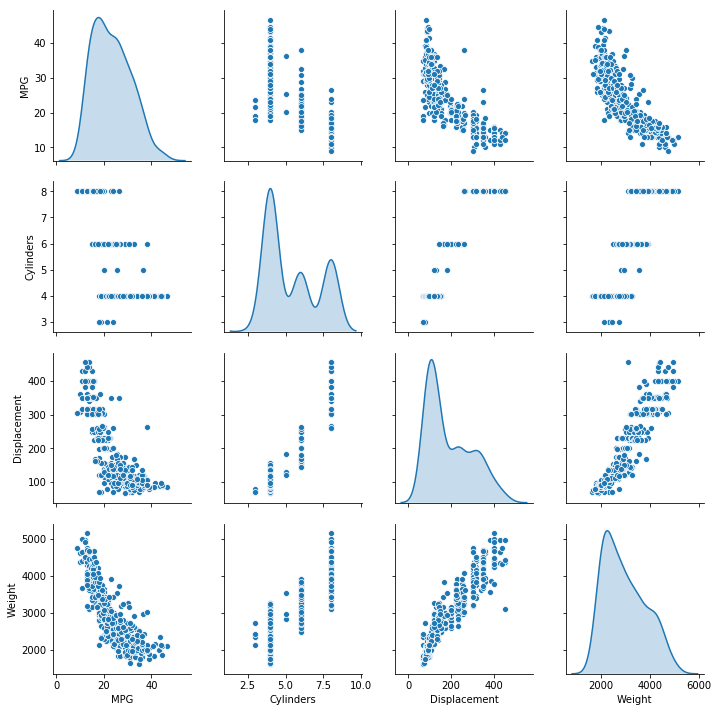

In [18]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 

dataset = pd.read_csv('/content/auto-mpg.data', names=column_names, sep=' ', 
                     skipinitialspace=True, comment='\t', na_values="?")

print(dataset.describe())
print(dataset.head(5))
print(len(dataset), dataset.shape)

sns.pairplot(dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [7]:
missed_values = dataset.isna().sum()
print("missed values: \n",missed_values)

# No problem deleting the 6 null values, otherwise we could also use sklearn imputer to deal with it
data = dataset.copy()
data.dropna(inplace=True)
data.isna().sum()
print(len(data), data.shape)

missed values: 
 MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64
392 (392, 8)


In [8]:
print(set(data.Origin.values))
data.Origin = data.Origin - 1
print(set(data.Origin))

{1, 2, 3}
{0, 1, 2}


In [9]:
# split the data into train_data and train_labels
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

print(X.shape, y.shape)

(392, 7) (392,)


In [10]:
print(X.head(5))
print(y.head(5))

    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year
0  18.0          8         307.0       130.0  3504.0          12.0          70
1  15.0          8         350.0       165.0  3693.0          11.5          70
2  18.0          8         318.0       150.0  3436.0          11.0          70
3  16.0          8         304.0       150.0  3433.0          12.0          70
4  17.0          8         302.0       140.0  3449.0          10.5          70
0    0
1    0
2    0
3    0
4    0
Name: Origin, dtype: int64


In [11]:
# normalize data

X = (X- X.mean()) / X.std()
print("X after Normalization: ")
print(X.head(5))

X after Normalization: 
        MPG  Cylinders  Displacement  ...    Weight  Acceleration  Model Year
0 -0.697747   1.482053      1.075915  ...  0.619748     -1.283618   -1.623241
1 -1.082115   1.482053      1.486832  ...  0.842258     -1.464852   -1.623241
2 -0.697747   1.482053      1.181033  ...  0.539692     -1.646086   -1.623241
3 -0.953992   1.482053      1.047246  ...  0.536160     -1.283618   -1.623241
4 -0.825870   1.482053      1.028134  ...  0.554997     -1.827320   -1.623241

[5 rows x 7 columns]


In [12]:
# create the model
model = keras.Sequential([
    
        keras.layers.Dense(X.shape[1]),
        keras.layers.Dense(128, activation=keras.activations.sigmoid),
        keras.layers.Dense(3, activation=keras.activations.softmax)
])


In [13]:
# compile the model

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(X_train.shape, y_train.shape, type(X_train))

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()
print(X_train.shape, y_train.shape, type(X_train))

(313, 7) (313,) <class 'pandas.core.frame.DataFrame'>
(313, 7) (313,) <class 'numpy.ndarray'>


In [15]:
model.fit(X_train, y_train, epochs=500)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/500
313/313 [==============================] - 3s 10ms/step - loss: 1.2201 - acc: 0.2748
Epoch 2/500
313/313 [==============================] - 0s 151us/step - loss: 0.8713 - acc: 0.6422
Epoch 3/500
313/313 [==============================] - 0s 160us/step - loss: 0.7736 - acc: 0.6454
Epoch 4/500
313/313 [==============================] - 0s 154us/step - loss: 0.7371 - acc: 0.6486
Epoch 5/500
313/313 [==============================] - 0s 167us/step - loss: 0.7062 - acc: 0.6837
Epoch 6/500
313/313 [==============================] - 0s 156us/step - loss: 0.6823 - acc: 0.6933
Epoch 7/500
313/313 [==============================] - 0s 157us/step - loss: 0.6686 - acc: 0.6965
Epoch 8/500
313/313 [==============================] - 0s 138us/step - loss: 0.6565 - acc: 0.7093
Epoch 9/500
313/313 [==============================] - 0s 160us/step - loss: 0.6488 - acc: 0.7252
Epoch 10/500
313/313 [===

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"loss= {loss} and accuracy= {accuracy}")

79/79 [==============================] - 0s 596us/step
loss= 0.6120433030249197 and accuracy= 0.7088607640206059
